## 実験概要
RV-SGDAveにおけるノイズの強度について変化させながら分割数ごとの過剰期待損失、そのステップごとの推移を確認する。

ノイズの種類
- 正規分布
    - 平均0
    - 分散
        - 1.5
        - 2.2
        - 2.4
- 対数正規分布
    - 平均0
    - 分散
        - 1.25
        - 1.75
        - 1.90

トライアルの回数は1000,ただし損失の推移についてはそのうちの一回を使用

## 結果
全ての結果において分割しない方が優位でありそう。
- SGD Averaged が効いてるのか？
- 分割によりコア内で学習に使えるサンプル数が少なくなり未学習で終わっている？


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

from ML2_lib import RV_SGDAve
from ML2_lib import loss
from ML2_lib import plot_set

In [2]:
X_mean = 5
X_var = 2

w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 10000
c = 5
noise = "normal"
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)
son = loss.LinearQuadraticLoss()
columns=['1', '2', '4','5','10','20']
k_list = [0,1,3,4,9,19]




  0%|          | 0/1000 [00:00<?, ?it/s]

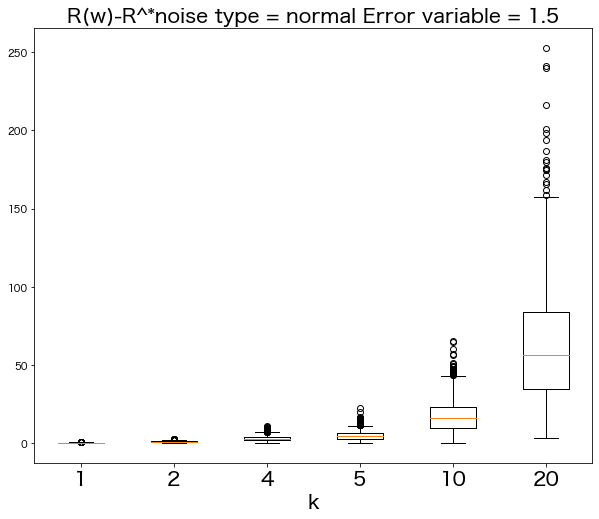

In [3]:
E_var = 1.5
title = f"noise type = {noise} Error variable = {E_var}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 1000
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [4]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.225158,0.822966,3.006814,4.741967,17.532854,62.648466
std,0.125855,0.462404,1.716068,2.877096,10.322170,37.542810
min,0.004651,0.028554,0.114196,0.270489,0.310960,2.959441
25%,0.130145,0.474402,1.757572,2.688147,9.760233,34.704158
50%,0.200900,0.737366,2.708013,4.212380,15.892734,56.066685
75%,0.302692,1.090365,3.945212,6.128851,23.207334,83.956569
max,0.722188,2.731898,11.161605,22.166369,65.130149,252.986742


  0%|          | 0/1000 [00:00<?, ?it/s]

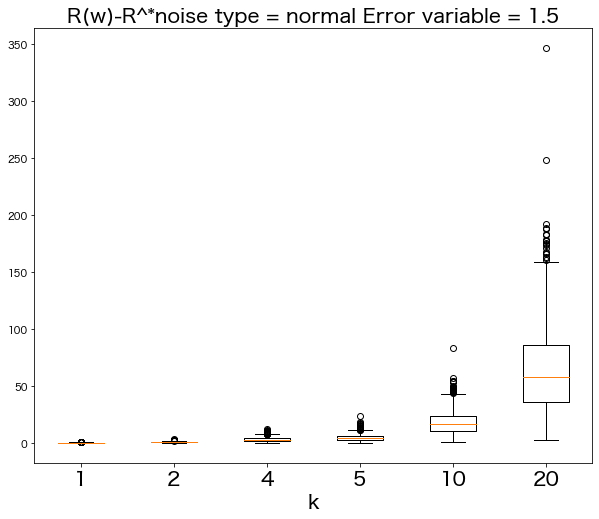

In [5]:
noise = "normal"
E_var = 2.2
title = f"noise type = {noise} Error variable = {E_var}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 1000
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [6]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.259482,0.880929,3.182375,4.881810,17.842810,64.190244
std,0.151361,0.503670,1.856405,2.906924,10.270160,38.606011
min,0.011680,0.033037,0.111554,0.153076,1.012027,2.249158
25%,0.147032,0.498721,1.804170,2.759467,10.182448,36.401208
50%,0.230299,0.805929,2.860348,4.419758,16.411210,57.768700
75%,0.341871,1.175156,4.211424,6.304740,23.395983,85.836192
max,1.030752,3.200070,11.966130,23.475724,83.707103,346.880176


  0%|          | 0/1000 [00:00<?, ?it/s]

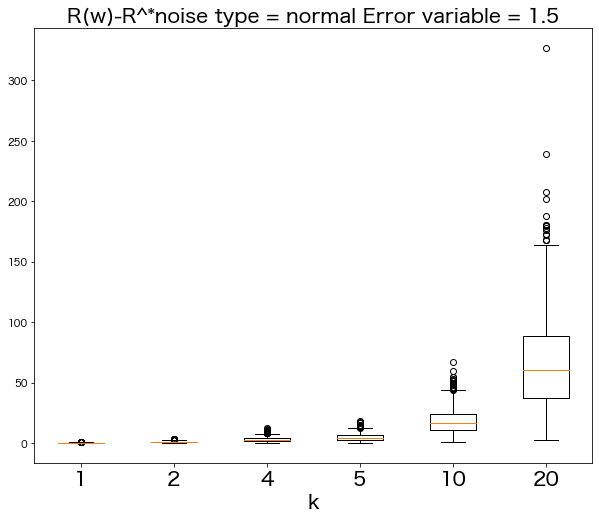

In [7]:
noise = "normal"
E_var = 2.4
title = f"noise type = {noise} Error variable = {E_var}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 1000
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [8]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.270008,0.934306,3.250578,4.993540,18.077388,65.951713
std,0.152911,0.541124,1.873673,2.897042,10.231702,38.754633
min,0.007684,0.062261,0.187115,0.204220,0.640253,2.369352
25%,0.151482,0.532615,1.913249,2.759124,10.618686,37.441585
50%,0.249307,0.841287,2.928239,4.498738,16.684174,60.340095
75%,0.360366,1.218057,4.285693,6.680914,23.889777,88.590768
max,1.148651,3.393564,12.152419,18.183918,66.840726,326.993898


  0%|          | 0/1000 [00:00<?, ?it/s]

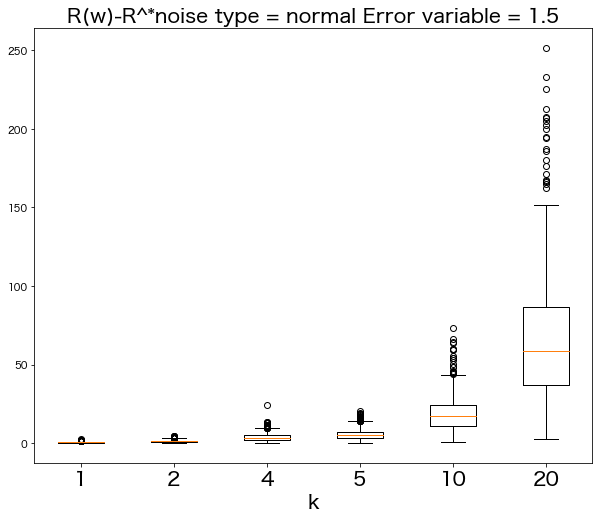

In [9]:
noise = "lognormal"
E_var = 1.25
title = f"noise type = {noise} Error variable = {E_var}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 1000
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [10]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.406065,1.184184,3.730626,5.487576,18.637863,65.156370
std,0.269219,0.741220,2.395924,3.315224,10.828293,38.643755
min,0.015212,0.057140,0.241646,0.216347,0.623399,2.379745
25%,0.228755,0.640652,1.957610,2.968808,11.075497,37.083896
50%,0.357610,1.041945,3.264334,4.932787,16.915321,58.789648
75%,0.523520,1.585004,4.938093,7.351440,24.257048,86.558606
max,2.499075,4.646520,24.150989,20.121058,73.509621,251.707672


  0%|          | 0/1000 [00:00<?, ?it/s]

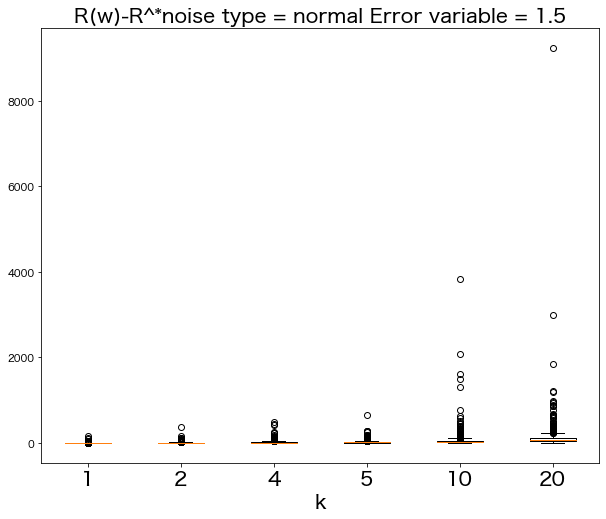

In [11]:
noise = "lognormal"
E_var = 1.75
title = f"noise type = {noise} Error variable = {E_var}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 1000
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [12]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.661901,9.910192,19.894987,22.283956,58.740380,121.469504
std,8.657133,17.273219,33.580470,33.112232,168.639218,329.964610
min,0.038773,0.237640,0.475021,1.178345,0.740138,5.057149
25%,1.736072,3.793795,6.786950,8.583306,18.522458,50.334678
50%,3.010032,6.391993,12.109907,15.069825,32.178876,81.183511
75%,5.047428,10.794582,20.642167,24.059487,54.890116,126.012543
max,168.576772,381.740848,484.897840,652.712392,3825.352249,9240.605097


  0%|          | 0/1000 [00:00<?, ?it/s]

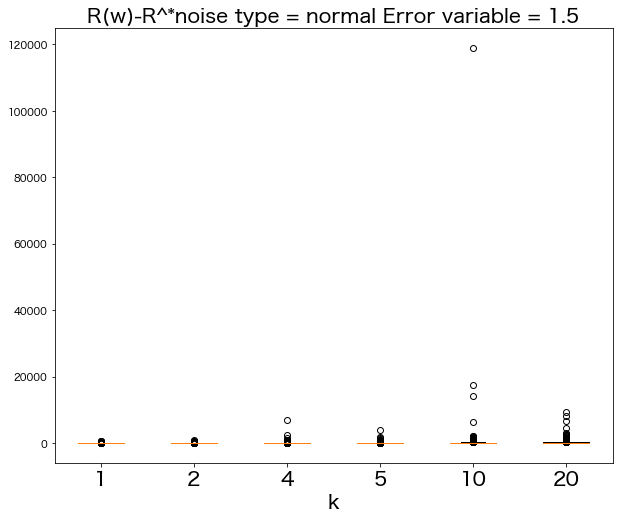

In [13]:
noise = "lognormal"
E_var = 1.90
title = f"noise type = {noise} Error variable = {E_var}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 1000
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [14]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,14.153081,24.627651,58.082459,60.435554,251.287315,187.524221
std,36.163521,50.663638,253.951117,170.544984,3832.542290,522.327210
min,0.422510,0.542753,0.876139,1.307309,0.931758,1.839059
25%,4.383465,7.586137,13.007353,15.129047,28.651191,58.331472
50%,7.743473,13.328826,23.709635,27.782117,50.160565,94.369665
75%,13.147662,25.033293,45.153442,54.042534,92.862594,164.660314
max,611.945972,1023.299029,7042.118278,4070.707774,118972.577225,9247.590241
